In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
sales=pd.read_excel("coffee Shop Sales.xlsx")
sales

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [4]:
# Making one month column of month names
# Insert syntax is sales.insert(index,column_name,value)

sales.insert(2,"month",sales["transaction_date"].dt.strftime("%B"))
sales.head()

,transaction_id,transaction_date,month,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,January,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,January,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,January,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,January,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,January,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
#to check number of rows and columns 
print(sales.shape)
print(f"number of rows : {sales.shape[0]} and number  of columns :{ sales.shape[1]}")
#the duplicated values 
print(f"number of duplicates:{sales.duplicated().sum}")

(149116, 12)
number of rows : 149116 and number  of columns :12
number of duplicates:<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
149111    False
149112    False
149113    False
149114    False
149115    False
Length: 149116, dtype: bool>


In [ ]:
#to view the datatypes and top rows
sales.head()
sales.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
month                       object
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [7]:
#to convert the data types from one to another
sales["transaction-time"]=pd.to_datetime(sales["transaction_time"],format="%H:%M:%S")

In [8]:
sales.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
month                       object
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
transaction-time    datetime64[ns]
dtype: object

In [9]:
# calculate the total sales
sales["total_sale"] = sales["unit_price"]*sales["transaction_qty"]
sales.head()

,transaction_id,transaction_date,month,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction-time,total_sale
0,1,2023-01-01,January,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1900-01-01 07:06:11,6.0
1,2,2023-01-01,January,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1900-01-01 07:08:56,6.2
2,3,2023-01-01,January,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1900-01-01 07:14:04,9.0
3,4,2023-01-01,January,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1900-01-01 07:20:24,2.0
4,5,2023-01-01,January,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1900-01-01 07:22:41,6.2


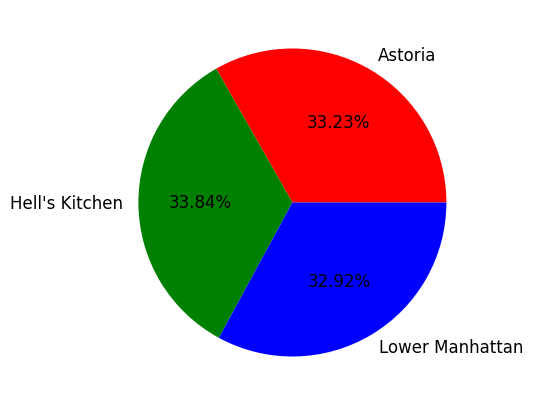

In [10]:
# Plot the graph finding total; sales as per locations 
store_sales=pd.DataFrame(sales.groupby("store_location")
                         ["total_sale"].sum()).reset_index()

# Plot the pie chart with matplotlib
plt.figure(figsize=(10,5))
plt.pie(store_sales["total_sale"],
        labels=store_sales["store_location"],
        autopct="%1.2f%%",#opacity=intensity of the colour

        colors=['red','green','blue'],
        textprops={'fontsize':12})
plt.show()
   

In [11]:
sales["store_location"].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [12]:
location=input("Enter the location('Lower Manhattan ,Hell's kitchen,Astoria):")
# Trend_sales=sales[sales["transaction_date"]dt.month==int(month)]
sales[sales'[sales["transaction_date"]==str]]]

SyntaxError: unterminated string literal (detected at line 3) (2675937634.py, line 3)

In [ ]:
print(sales["product_category"].unique())
#data wise sales using input user for month  year
month=input("enter the month:")

# Trend_sales=sales[sales["transaction_date"].dt.month==int(month)]
date_trend_sales=pd.DataFrame(sales[sales["transaction_date"].dt.month==int(month)].groupby(sales["transaction_date"].dt.date)["total_sale"].sum()).reset_index()
date_trend_sales["transaction_date"]=pd.to_datetime(date_trend_sales["transaction_date"])
print(date_trend_sales)

# Ploting line chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sales['transaction_date'],date_trend_sales['total_sale'],marker='o',linestyle='-',color='red',label='total_sale')
plt.title('month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total sale',fontsize=14)
plt.grid( True, linestyle='--',alpha=0.6)
plt.xticks(date_trend_sales['transaction_date'],labels=date_trend_sales['transaction_date'].dt.strftime('%y-%m-%d'),rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


ValueError: invalid literal for int() with base 10: 'May'

In [ ]:
# Ploting line chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sales['transaction_date'],date_trend_sales['total_sale'],marker='o',linestyle='-',color='red',label='total_sale')
plt.title('month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total sale',fontsize=14)
plt.grid( True, linestyle='--',alpha=0.6)
plt.xticks(date_trend_sales['transaction_date'],labels=date_trend_sales['transaction_date'].dt.strftime('%y-%m-%d'),rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'date_trend_sales' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# To  find the sales based on the store location and in the specific month
 
sales.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
month                       object
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
transaction-time    datetime64[ns]
total_sale                 float64
dtype: object

In [ ]:
#print(sales["product_category"].unique())
#data wise sales using input user for month  year
month=input("enter the month:")
location=input("enter the store location:")

# Trend_sales=sales[sales["transaction_date"].dt.month==int(month)]
date_trend_sales=pd.DataFrame(sales[sales["transaction_date"].dt.month==int(month)].groupby(sales["transaction_date"].dt.date)["total_sale"].sum()).reset_index()
date_trend_sales["transaction_date"]=pd.to_datetime(date_trend_sales["transaction_date"])
print(date_trend_sales)

# Ploting line chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sales['transaction_date'],date_trend_sales['total_sale'],marker='o',linestyle='-',color='red',label='total_sale')
plt.title('month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total sale',fontsize=14)
plt.grid( True, linestyle='--',alpha=0.6)
plt.xticks(date_trend_sales['transaction_date'],labels=date_trend_sales['transaction_date'].dt.strftime('%y-%m-%d'),rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



ValueError: invalid literal for int() with base 10: 'June'

In [ ]:
# Making a columns of day of week
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

sales.insert(5, "day_of_week", sales["transaction_date"].dt.strftime("%A"))
sales.head()

,transaction_id,transaction_date,month,transaction_time,transaction_qty,day_of_week,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction-time,total_sale
0,1,2023-01-01,January,07:06:11,2,Sunday,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1900-01-01 07:06:11,6.0
1,2,2023-01-01,January,07:08:56,2,Sunday,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1900-01-01 07:08:56,6.2
2,3,2023-01-01,January,07:14:04,2,Sunday,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1900-01-01 07:14:04,9.0
3,4,2023-01-01,January,07:20:24,1,Sunday,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1900-01-01 07:20:24,2.0
4,5,2023-01-01,January,07:22:41,2,Sunday,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1900-01-01 07:22:41,6.2


#### **Problem 1 
Question - Write a Python script that prompts the user to enter a month and a store location. Using a dataset containing "transaction_date" and "total_sales", filter the data to calculate total daily sales for the selected month and location. Then, visualize the sales trend using a line chart. Ensuring proper date formatting on the x-axis.**

Empty DataFrame
Columns: [transaction_date, total_sale]
Index: []


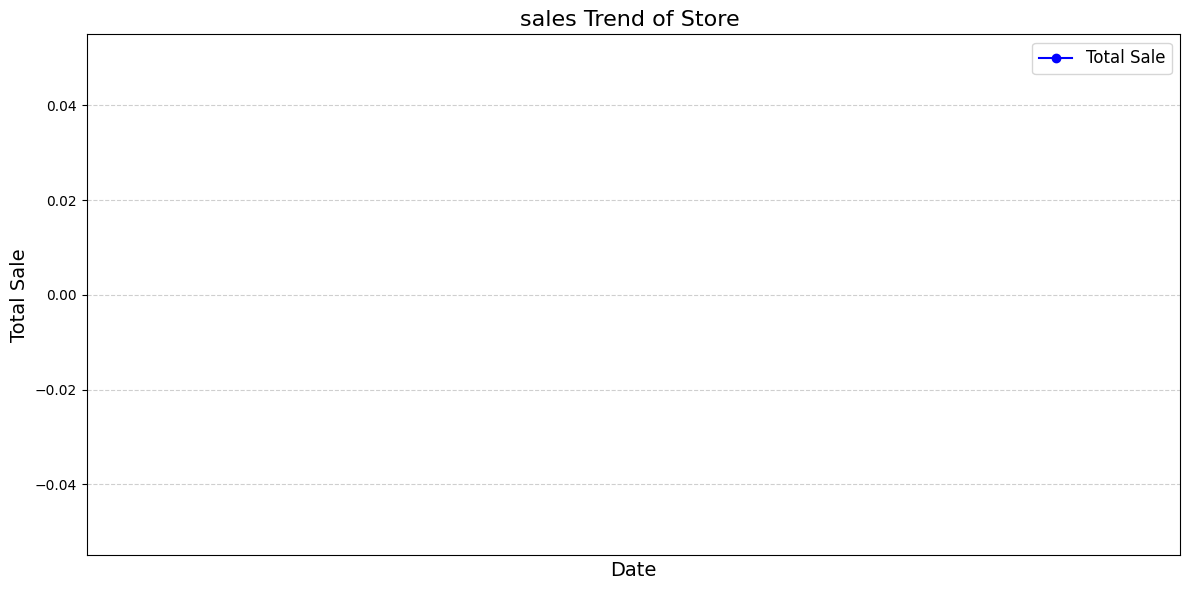

In [13]:
# Question - Write a Python script 

# Datewise sales using input user for month year
month = input("Enter the month, 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December': ")
location = input("Enter the location'Lower Manhattan, Hell's Kitchen, Astoria : ")

# trend_sales = sales[sales["transaction_date"].dt.month == int(month)]
date_trend_sale = pd.DataFrame(sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                                     (sales["store_location"] == location)]
                                     .groupby(sales["transaction_date"].dt.date)["total_sale"].sum()).reset_index()
date_trend_sale["transaction_date"] = pd.to_datetime(date_trend_sale["transaction_date"])

print(date_trend_sale)


# Ploting Line Chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sale['transaction_date'], date_trend_sale['total_sale'], marker='o',linestyle='-', color='blue', label='Total Sale')
plt.title(f'{month}sales Trend of Store {location}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'], labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


### **Question - Write a Python Script that prompts the user to enter a month and a product category. Using a dataset with "transaction_date","product_category", and "transaction_qty", filter the data to compute the total quantity sold for each product type within the selected month and category. Visualize the results using a bar chart, ensuring proper labelling and formatting** ###


In [14]:
month = input("Enter the month (in numbers) : ")
product_category = input("Enter the product_category,'Coffee'/'Tea'/'Drinking Chocolate'/'Bakery'/'Flavours'/'Loose Tea'/'Coffee Beans'/'Package'")

qty_order_pt = pd.DataFrame(sales[sales["transaction_date"].dt.month == int(month) &
                                  (sales["product_category"] == product_category)].groupby("product_type")["transaction_qty"].sum()).reset_index()

qty_order_pt

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar_label(plt.bar(qty_order_pt['product_type'], qty_order_pt['transaction_qty'], color='green', label='Total Sales'))
plt.title(f'{month}sales Trend of Store {product_category}', fontsize=16)
plt.xlabel('Product Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(qty_order_pt['product_type'], labels=qty_order_pt['product_type'], rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

ValueError: invalid literal for int() with base 10: ''

In [15]:



import pandas as pd
import matplotlib.pyplot as plt

month = input("Enter the month (e.g., 'January', 'February', etc.): ")
location = input("Enter the location (e.g., 'Lower Manhattan', 'Hell's Kitchen', 'Astoria'): ")

# Assuming 'sales' is a DataFrame already defined
sales['day_of_week'] = sales['transaction_date'].dt.day_name()

# Filter by month and location
filtered_sales = sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                       (sales["store_location"] == location)]

# Group by day of the week and store location
weekly_sales = filtered_sales.groupby(['day_of_week', 'store_location'])['total_sale'].sum().unstack().fillna(0)

print(weekly_sales)

# Plotting Line Chart
plt.figure(figsize=(12,6))
weekly_sales.plot(kind='bar', figsize=(12, 6))
plt.title(f'{month} Sales Trend by Day of the Week in {location}', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title='Store Location', fontsize=12)
plt.tight_layout()
plt.show()

Empty DataFrame
Columns: []
Index: []


TypeError: no numeric data to plot

<Figure size 1200x600 with 0 Axes>

store_location   Astoria
day_of_week             
Friday           9335.78
Monday           7608.58
Saturday         7893.15
Sunday           7250.13
Thursday        10101.54
Tuesday          6377.48
Wednesday        6516.45


<Figure size 1200x600 with 0 Axes>

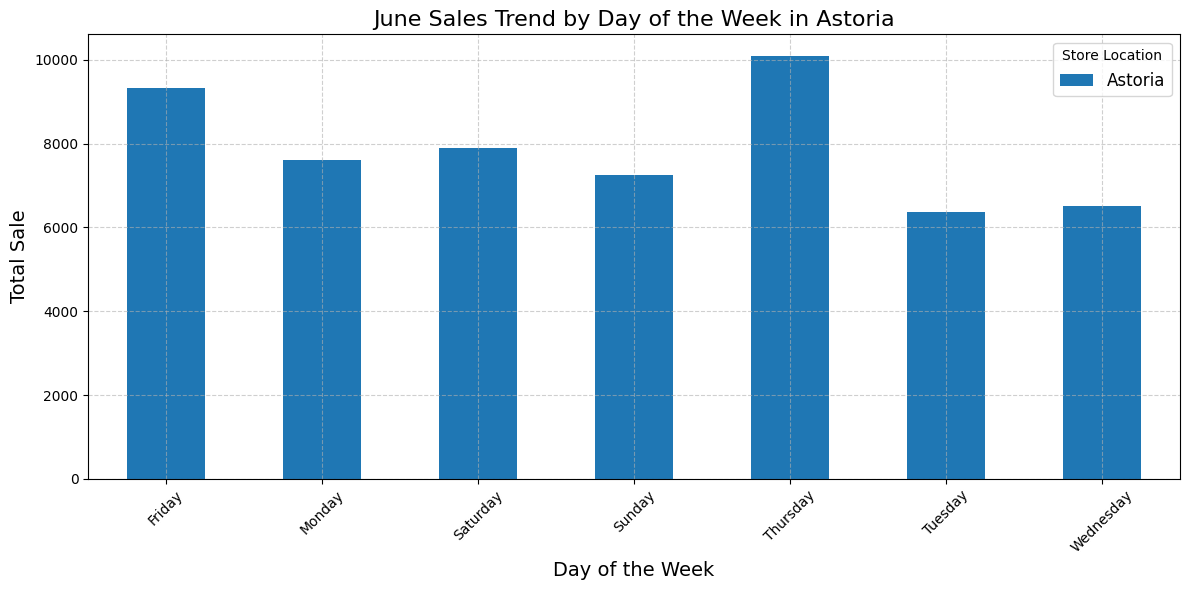

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

month = input("Enter the month (e.g., 'January', 'February', etc.): ")
location = input("Enter the location (e.g., 'Lower Manhattan', 'Hell's Kitchen', 'Astoria'): ")

# Assuming 'sales' is a DataFrame already defined
sales['day_of_week'] = sales['transaction_date'].dt.day_name()

# Filter by month and location
filtered_sales = sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                       (sales["store_location"] == location)]

# Group by day of the week and store location
weekly_sales = filtered_sales.groupby(['day_of_week', 'store_location'])['total_sale'].sum().unstack().fillna(0)

print(weekly_sales)

# Plotting Line Chart
plt.figure(figsize=(12,6))
weekly_sales.plot(kind='bar', figsize=(12, 6))
plt.title(f'{month} Sales Trend by Day of the Week in {location}', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title='Store Location', fontsize=12)
plt.tight_layout()
plt.show()

Empty DataFrame
Columns: [week_part, total_sale]
Index: []


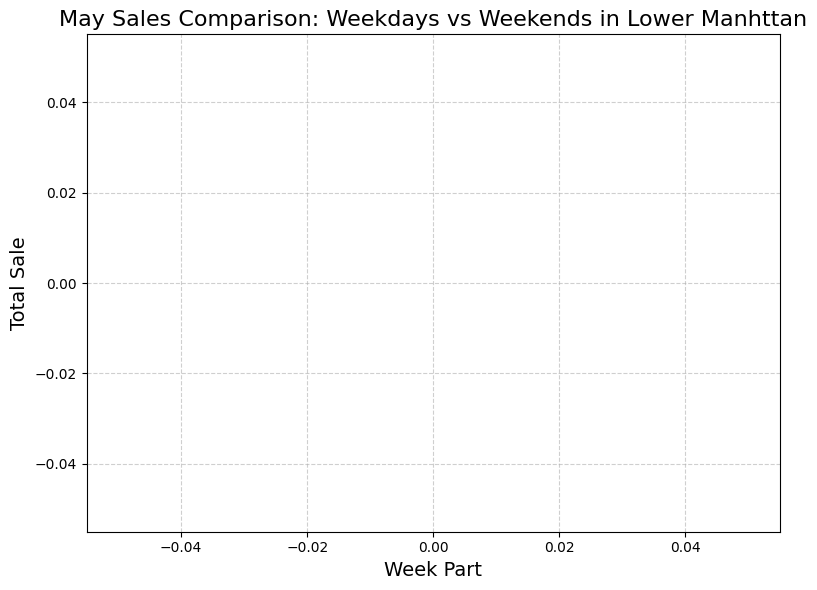

In [ ]:


month = input("Enter the month (e.g., 'January', 'February', etc.): ")
location = input("Enter the location (e.g., 'Lower Manhattan', 'Hell's Kitchen', 'Astoria'): ")

# Assuming 'sales' is a DataFrame already defined
sales['day_of_week'] = sales['transaction_date'].dt.day_name()
sales['week_part'] = sales['transaction_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Filter by month and location
filtered_sales = sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                       (sales["store_location"] == location)]

# Group by week part
week_part_sales = filtered_sales.groupby('week_part')['total_sale'].sum().reset_index()

print(week_part_sales)

# Plotting Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(week_part_sales['week_part'], week_part_sales['total_sale'], color=['blue', 'orange'])
plt.title(f'{month} Sales Comparison: Weekdays vs Weekends in {location}', fontsize=16)
plt.xlabel('Week Part', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
month = input("Enter the month (e.g., 'January', 'February', etc.): ")
product = input("Enter the product name: ")

# Assuming 'sales' is a DataFrame already defined
sales['day_of_week'] = sales['transaction_date'].dt.day_name()
sales['week_part'] = sales['transaction_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Filter by month and product
filtered_sales = sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                       (sales["product_name"] == product)]

# Group by store location
store_sales = filtered_sales.groupby('store_location')['total_sale'].sum().reset_index()

print(store_sales)

# Plotting Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(store_sales['store_location'], store_sales['total_sale'], color='blue')
plt.title(f'{month} Sales of {product} by Store Location', fontsize=16)
plt.xlabel('Store Location', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'product_name'

In [ ]:
# What is the trend of coffee vs tea sales over time?

month=input("Enter the month['January','February','March','April','May','June']:")

tea_data=sales[(sale["product_category"]=="Tea")&
               (sales["transaction_date"].dt.strftime("%B")==month)].groupby("transaction_date")["total_sales"].sum().reset_index()
coffee_data=sale[(sales["product_category"]=="Coffee")&
               (sales["transaction_date"].dt.strftime("%B")==month)].groupby("transaction_date")["total_sales"].sum().reset_index()

NameError: name 'sale' is not defined

In [ ]:
m1=input("Enter the month=")
p1=input("Enter the product category=")
p2=input("Enter the product category=")
d1=pd.DataFrame(sales[(sales['transaction_date'].dt.month==int(m1))&(sales["product_category"]==p1)].groupby("transaction_date")["total_sale"].sum()).reset_index()
d1["transaction_date"]=pd.to_datetime(date_trend_sale["transaction_date"])
d2=pd.DataFrame(sales[(sales['transaction_date'].dt.month==int(m1))&(sales["product_category"]==p2)].groupby("transaction_date")["total_sale"].sum()).reset_index()
d2["transaction_date"]=pd.to_datetime(date_trend_sale["transaction_date"])
plt.figure(figsize=(15,10))
plt.plot(d1['transaction_date'],d1['total_sale'],
         marker='o',linestyle='--',color='red',label='Total sale')
plt.plot(d2['transaction_date'],d2['total_sale'],
         marker='o',linestyle='--',color='orange',label='Total sale')
plt.title('Month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total Sale',fontsize=14)
plt.grid(True, linestyle='--',alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'],labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'),rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

ValueError: invalid literal for int() with base 10: ''

## **Scatter plot**

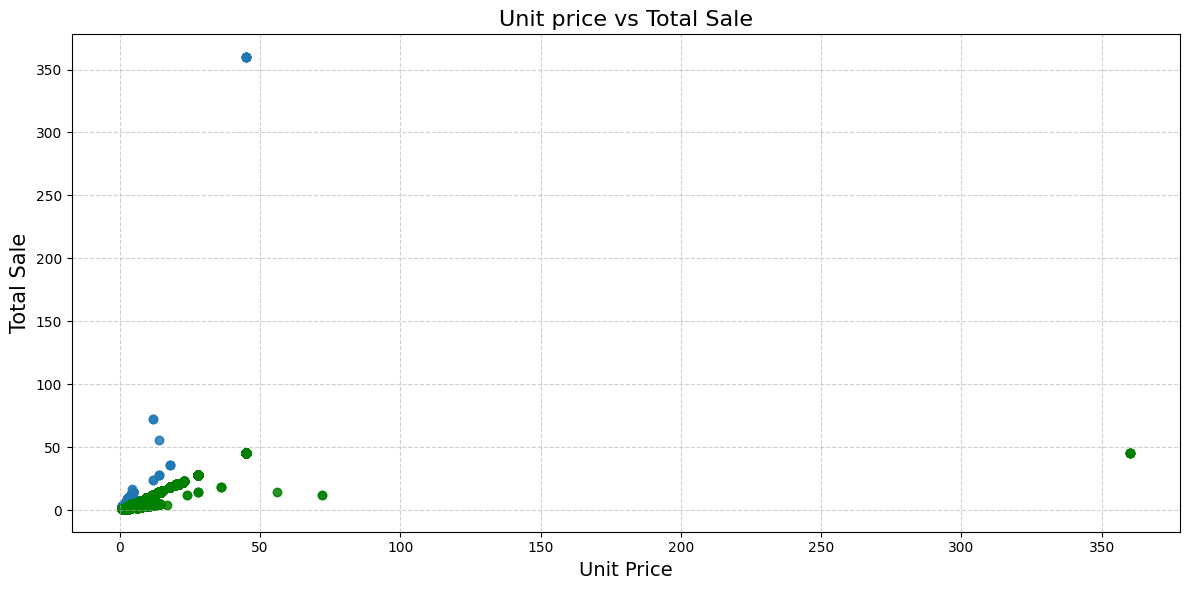

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(sales['unit_price'],sales['total_sale'],colorizer='red',alpha=0.6,label="unit_price")
# plot total sales(green)
plt.scatter(sales['total_sale'],sales['unit_price'],color='green',alpha=0.6,label="total sale")
plt.title('Unit price vs Total Sale',fontsize=16)
plt.xlabel('Unit Price',fontsize=14)
plt.ylabel('Total Sale',fontsize=15)
plt.grid(True, linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

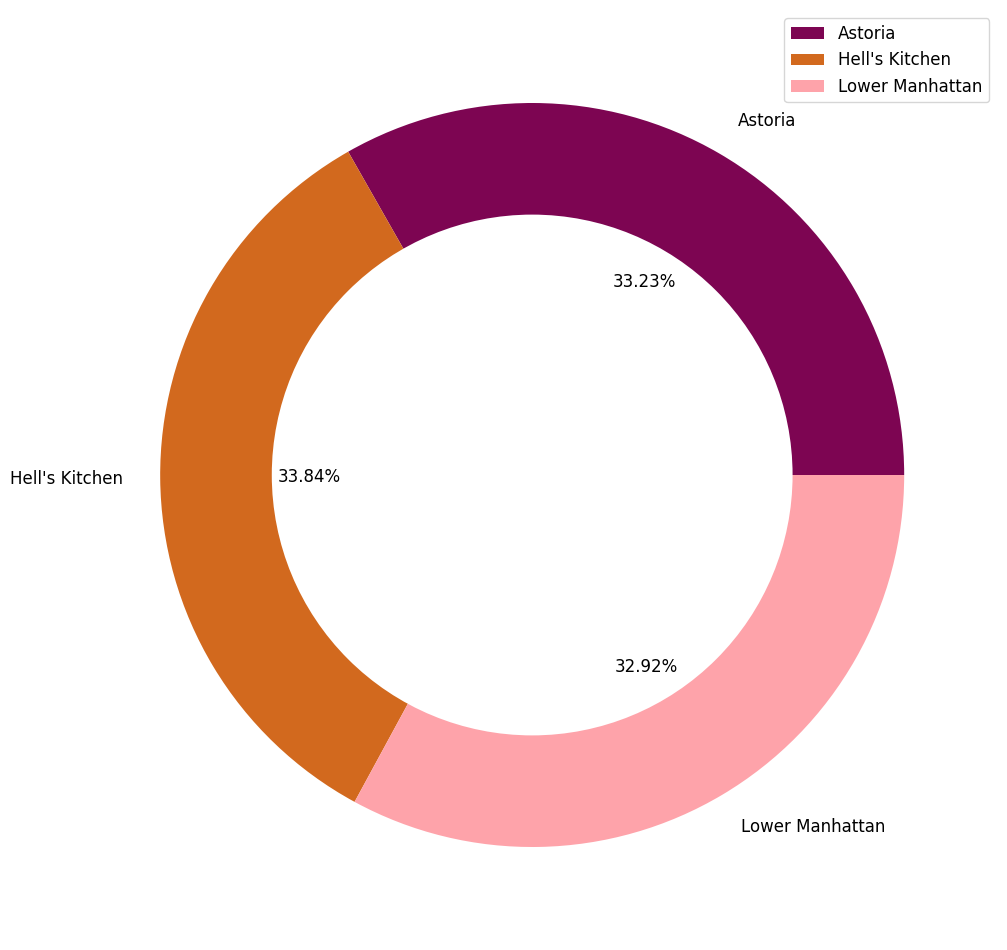

In [17]:
# dount chart
store_sales=pd.DataFrame(sales.groupby("store_location")["total_sale"].sum()).reset_index()
plt.figure(figsize=(12,14))
plt.pie(store_sales["total_sale"],
        labels=store_sales["store_location"],
        autopct='%1.2f%%',
        colors=["#7D0552","#D2691E","#FEA3AA"],
        textprops={'fontsize':12})
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.legend(fontsize=12,loc='upper right')
plt.show()